In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

FILE_NAME = '../2019-05-11 121314.txt'

In [2]:
X, y = [], []

def encode_field(field):
    if field == 0:
        return [1, 0, 0]
    elif field == -1:
        return [0, 1, 0]
    else:
        return [0, 0, 1]

with open(FILE_NAME) as file:
    for line in file:
        line = line.strip()
        line_split = list(map(int, line.split(' ')))
        
        board = [encode_field(field) for field in line_split[:64]]
        
        N = sum(line_split[64:67])
        black_prob = line_split[64] / N * 100.0
        
        X.append(board)
        y.append(black_prob)
        
X = np.array(X)
y = np.array(y)

X = X.reshape(-1, 8, 8, 3)
print(X.shape)

(10000, 8, 8, 3)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
def get_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(192,)))
    model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    # model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='relu'))
    
    return model

def get_model2():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(16, kernel_size=(3, 3),
                            activation='relu',
                            padding='same',
                            input_shape=(8, 8, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='relu'))
    
    return model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
6400/6400 [==============================] - 2s 299us/sample - loss: 1283.2759 - mean_absolute_error: 28.7646 - val_loss: 292.0165 - val_mean_absolute_error: 12.3871
Epoch 2/1000
6400/6400 [==============================] - 0s 69us/sample - loss: 273.8574 - mean_absolute_error: 11.8760 - val_loss: 252.9557 - val_mean_absolute_error: 11.4431
Epoch 3/1000
6400/6400 [==============================] - 0s 72us/sample - loss: 240.2374 - mean_absolute_error: 11.0655 - val_loss: 230.1777 - val_mean_absolute_error: 11.0169
Epoch 4/1000
6400/6400 [==============================] - 0s 70us/sample - loss: 218.0511 - mean_absolute_error: 10.5541 - val_loss: 210.5160 - val_mean_absolute_error: 10.4025
Epoch 5/1000
6400/6400 [==============================] - 1s 86us/sample -

Epoch 43/1000
6400/6400 [==============================] - 0s 66us/sample - loss: 54.8341 - mean_absolute_error: 5.2198 - val_loss: 71.1614 - val_mean_absolute_error: 5.9672
Epoch 44/1000
6400/6400 [==============================] - 1s 79us/sample - loss: 54.5106 - mean_absolute_error: 5.2313 - val_loss: 74.2076 - val_mean_absolute_error: 6.2180
Epoch 45/1000
6400/6400 [==============================] - 1s 89us/sample - loss: 53.1617 - mean_absolute_error: 5.1530 - val_loss: 66.5383 - val_mean_absolute_error: 5.7327
Epoch 46/1000
6400/6400 [==============================] - 1s 87us/sample - loss: 52.9253 - mean_absolute_error: 5.1474 - val_loss: 71.8637 - val_mean_absolute_error: 6.0807
Epoch 47/1000
6400/6400 [==============================] - 0s 78us/sample - loss: 52.2627 - mean_absolute_error: 5.1124 - val_loss: 65.5187 - val_mean_absolute_error: 5.6729
Epoch 48/1000
6400/6400 [==============================] - 1s 93us/sample - loss: 52.0874 - mean_absolute_error: 5.1357 - val_loss

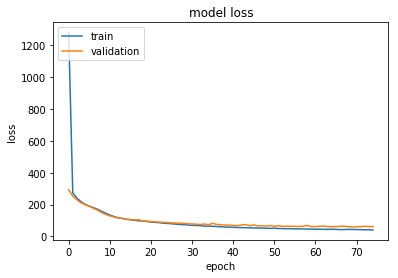

2000/2000 [==============================] - 0s 86us/sample - loss: 59.4668 - mean_absolute_error: 5.2635

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:t

b'./saved_models\\1559243024'

In [5]:
model = get_model2()
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='mse',
              metrics=['mae']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor='val_loss'
    )
]

history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.evaluate(X_test, y_test)

tf.contrib.saved_model.save_keras_model(model, "./saved_models")

In [8]:
numer = 1700

print(model.predict(X_test)[numer])
print(y_test[numer])

[40.743443]
43.235
